# Análisis de Variabilidad de las Empresas

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Establecer el estilo de las gráficas
plt.style.use('seaborn-v0_8')

## Cálculo de la Variabilidad

In [11]:
# Función para analizar la variabilidad de los precios de cierre
def analizar_variabilidad(file_path, ticker):
    # Cargar datos
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Desviación estándar móvil
    df['Rolling_Std'] = df['Close'].rolling(window=20).std()
    
    # Cálculo del ATR (Average True Range)
    df['High-Low'] = df['High'] - df['Low']
    df['High-Close'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-Close'] = abs(df['Low'] - df['Close'].shift(1))
    df['True Range'] = df[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    df['ATR'] = df['True Range'].rolling(window=14).mean()
    
    # Calcular métricas clave
    rolling_std_mean = df['Rolling_Std'].mean()
    atr_mean = df['ATR'].mean()
    
    return {'Ticker': ticker, 'Desv. Estándar Móvil Promedio': rolling_std_mean, 'ATR Promedio': atr_mean}

# Empresas a analizar
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOGL']
resultados = []

# Analizar variabilidad para cada empresa
for ticker in tickers:
    file_path = f'../Data/Global_Data_{ticker}.csv'  # Ruta del dataset
    print(f'Analizando variabilidad de {ticker}...')
    resultado = analizar_variabilidad(file_path, ticker)
    resultados.append(resultado)

# Convertir resultados en DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv('../Data/Variabilidad_Empresas.csv', index=False)

Analizando variabilidad de AAPL...
Analizando variabilidad de MSFT...
Analizando variabilidad de TSLA...
Analizando variabilidad de AMZN...
Analizando variabilidad de GOOGL...


## Visualización de la Variabilidad

<Figure size 1200x600 with 0 Axes>

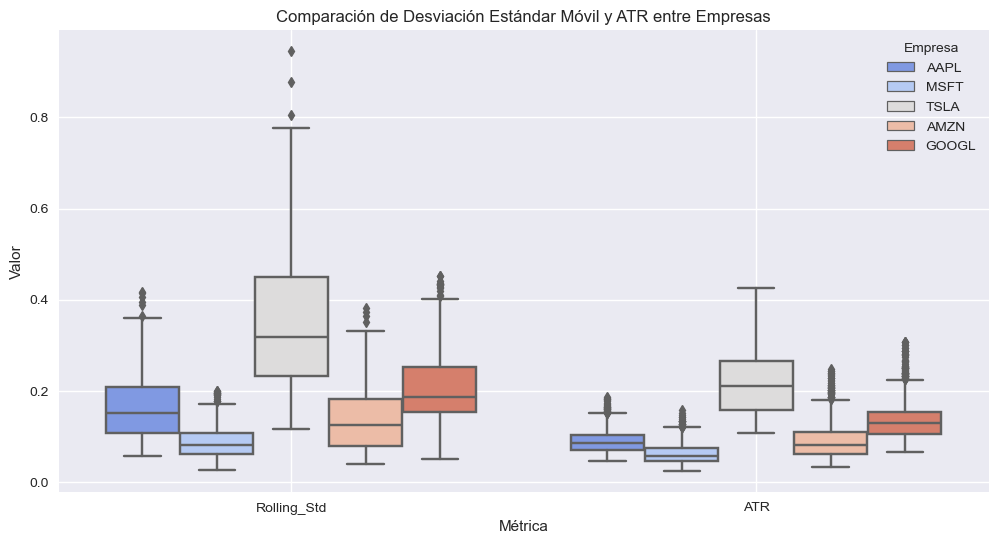

In [12]:
# Crear diagrama de cajas para comparar la variabilidad entre empresas
plt.figure(figsize=(12, 6))
metricas = ['Desv. Estándar Móvil Promedio', 'ATR Promedio']

df_melted = df_resultados.melt(id_vars=['Ticker'], value_vars=metricas, var_name='Métrica', value_name='Valor')

df_melted = pd.DataFrame()
for ticker in tickers:
    file_path = f'../Data/Global_Data_{ticker}.csv'
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    df['Rolling_Std'] = df['Close'].rolling(window=20).std()
    df['High-Low'] = df['High'] - df['Low']
    df['High-Close'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-Close'] = abs(df['Low'] - df['Close'].shift(1))
    df['True Range'] = df[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    df['ATR'] = df['True Range'].rolling(window=14).mean()

    df_temp = df[['Rolling_Std', 'ATR']].dropna().reset_index()
    df_temp['Ticker'] = ticker
    df_melted = pd.concat([df_melted, df_temp])

df_melted = df_melted.melt(id_vars=['Date', 'Ticker'], value_vars=['Rolling_Std', 'ATR'],
                            var_name='Métrica', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Métrica', y='Valor', hue='Ticker', palette='coolwarm')
plt.title('Comparación de Desviación Estándar Móvil y ATR entre Empresas')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.legend(title='Empresa')
plt.grid(True)
plt.show()